In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install Livelossplot
from livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# AIM
## To classify the images into 
### IDC+
### IDC-

# Validation Strategy:


# Augmentaions Used:
## No Augmentation


In [2]:

import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

print("All modules have been imported")

All modules have been imported


In [3]:
import os
os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  

In [4]:
sampling_seed=0
size_4_training=300
img_size=299
epoch1=10
epoch2=3
training_reshape=(-1, img_size, img_size, 3)

Image labelling

In [5]:
import random
#make directory for labelling
os.makedirs('../working/idc2/idc-minus/')     
os.makedirs('../working/idc2/idc-plus/')  


class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class1sample=random.sample(class1,size_4_training)


def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0path='../working/idc2/idc-minus/'
class1path='../working/idc2/idc-plus/'




read_and_save_data(class0path,class0sample)
read_and_save_data(class1path,class1sample)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [6]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)

In [7]:
import cv2
'''
def readImage(path, X, Y, label):
    j=0
 
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img =cv2.resize(img,(50, 50))
        X.append(img)
        Y.append(label)
        j=j+1
        #if j==10:
        #    break
        
    return X, Y
    '''
def readImage(path, tag):
    j=0
    image_array = []
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_array.append([img_resized, tag])
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_array
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)
class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(combined_data.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#pring(y.shape)

# reshape X data
X = np.array(X).reshape(training_reshape)


X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(300, 2)
(600, 2)
(420, 299, 299, 3) (54, 299, 299, 3) (126, 299, 299, 3) (420, 2) (54, 2) (126, 2)


In [8]:

#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
nClasses=3

In [9]:

from PIL import Image
import glob


In [10]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


#import image

In [11]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(420, 299, 299, 3) (54, 299, 299, 3) (126, 299, 299, 3) (420, 2) (54, 2) (126, 2)


In [12]:
#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
nClasses=2

# model

In [13]:
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'sigmoid'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

from tensorflow.keras.applications import Xception
base_model = Xception(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)
#from tensorflow.keras.applications.mobilenet import MobileNet
#base_model =  MobileNet(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)
#from tensorflow.keras.applications import MobileNetV2
#base_Neural_Net= MobileNetV2(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)
base_model.trainable = False
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(4096,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(4096,activation="relu"))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2096,activation="relu"))
model.add(Dense(2, activation='sigmoid'))
#model = Model(inputs=resnet50_base_model.input, outputs=predictions)
model.summary()


2022-05-24 16:07:46.057682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 16:07:46.063209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 16:07:46.063908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 16:07:46.065057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 22s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 204800)            819200    
_________________________________________________________________
dense (Dense)                (None, 4096)              838864896 
_________________________________________________________________
batch_normalization_5 (Batch (None, 4096)              16384     
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
________________________________________________________

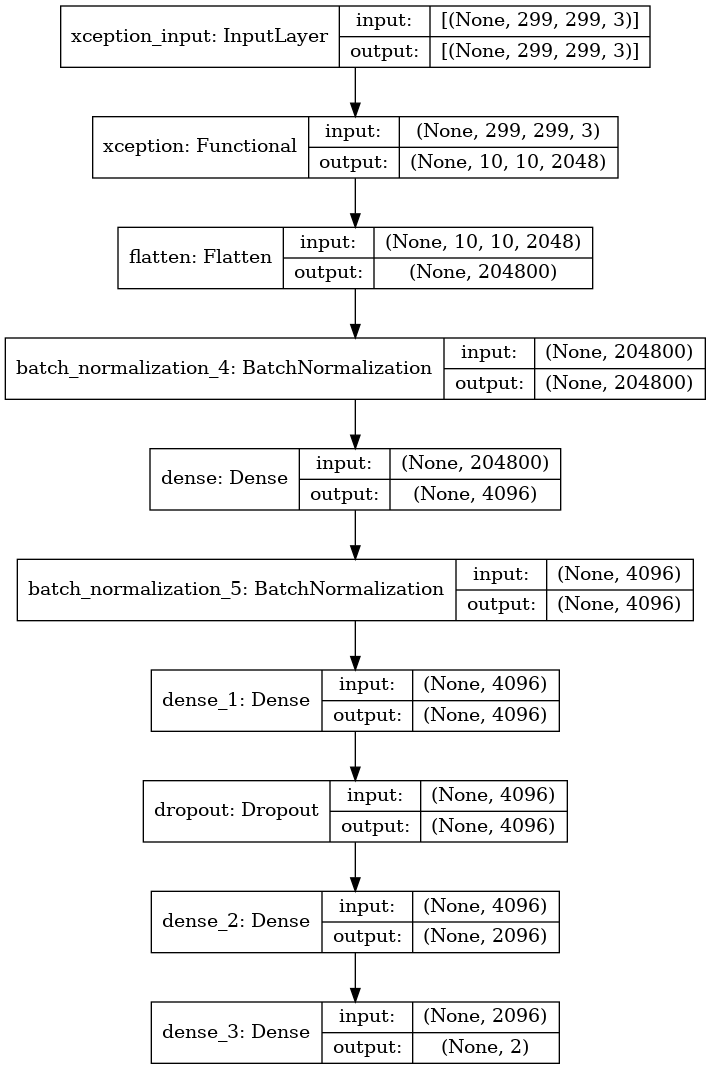

In [14]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [15]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [16]:
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
def get_accuracy_metrics(model, X_train, y_train, X_val, y_val, X_test, y_test):
    y_train=np.argmax(y_train, axis=1)
    y_test=np.argmax(y_test, axis=1)
    y_val=np.argmax(y_val, axis=1)
    y_train_pred=np.argmax(model.predict(X_train),axis=1)
    y_test_pred=np.argmax(model.predict(X_test),axis=1)
    y_val_pred=np.argmax(model.predict(X_val),axis=1)
    #ps:all the Y value must turn back to 1 dimension array. otherwise, the scoring functions in sklearn cannot compare, and will give an error
    #classification metrics can't handle a mix of continuous-multioutput and multi-label-indicator targets
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_train_pred)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_val_pred)*100), "%")
    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_test_pred)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_test_pred, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_test_pred)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_test_pred, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_test_pred, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_test_pred)
    cf_matrix_val = confusion_matrix(y_val, y_val_pred)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()

In [17]:
callbacks1 =  [EarlyStopping(monitor='val_loss', patience=5, verbose=1), ModelCheckpoint('init_model.h5', save_best_only=True)]
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
%time
history1=model.fit(X_train, y_train,validation_data=(X_test, y_test),verbose = 1,epochs = epoch1,callbacks=callbacks1)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


2022-05-24 16:08:15.179376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-05-24 16:08:19.065313: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/14 [=>............................] - ETA: 2:08 - loss: 0.7908 - accuracy: 0.5000

2022-05-24 16:08:24.951506: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


14/14 [==============================] - ETA: 0s - loss: 3.2969 - accuracy: 0.7714

2022-05-24 16:08:27.821703: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


14/14 [==============================] - 14s 313ms/step - loss: 3.2969 - accuracy: 0.7714 - val_loss: 13.1651 - val_accuracy: 0.8519


2022-05-24 16:08:29.135045: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-24 16:08:29.321147: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3355443200 exceeds 10% of free system memory.
2022-05-24 16:08:44.601120: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3355443200 exceeds 10% of free system memory.
2022-05-24 16:08:50.921863: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3355443200 exceeds 10% of free system memory.


Epoch 2/10
14/14 [==============================] - 4s 238ms/step - loss: 0.4055 - accuracy: 0.8952 - val_loss: 10.1717 - val_accuracy: 0.8519


2022-05-24 16:09:26.922526: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3355443200 exceeds 10% of free system memory.
2022-05-24 16:09:40.572087: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3355443200 exceeds 10% of free system memory.


Epoch 3/10
14/14 [==============================] - 3s 233ms/step - loss: 0.1922 - accuracy: 0.9381 - val_loss: 3.2993 - val_accuracy: 0.8519
Epoch 4/10
14/14 [==============================] - 3s 226ms/step - loss: 0.2671 - accuracy: 0.9143 - val_loss: 6.8902 - val_accuracy: 0.8519
Epoch 5/10
14/14 [==============================] - 3s 225ms/step - loss: 0.2159 - accuracy: 0.9548 - val_loss: 2.9236 - val_accuracy: 0.8704
Epoch 6/10
14/14 [==============================] - 3s 226ms/step - loss: 0.1253 - accuracy: 0.9571 - val_loss: 2.3981 - val_accuracy: 0.8704
Epoch 7/10
14/14 [==============================] - 3s 226ms/step - loss: 0.1089 - accuracy: 0.9595 - val_loss: 1.7046 - val_accuracy: 0.8704
Epoch 8/10
14/14 [==============================] - 3s 229ms/step - loss: 0.2005 - accuracy: 0.9524 - val_loss: 2.1682 - val_accuracy: 0.8704
Epoch 9/10
14/14 [==============================] - 3s 225ms/step - loss: 0.1813 - accuracy: 0.9595 - val_loss: 1.8319 - val_accuracy: 0.8704
Epoch 

2022-05-24 16:16:45.474075: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Train accuracy Score------------>
95.714 %
Val accuracy Score--------->
88.095 %
Test accuracy Score--------->
87.037 %
F1 Score--------------->
82.454 %
Cohen Kappa Score------------->
19.574 %
Recall-------------->
87.037 %
Precision-------------->
88.749 %


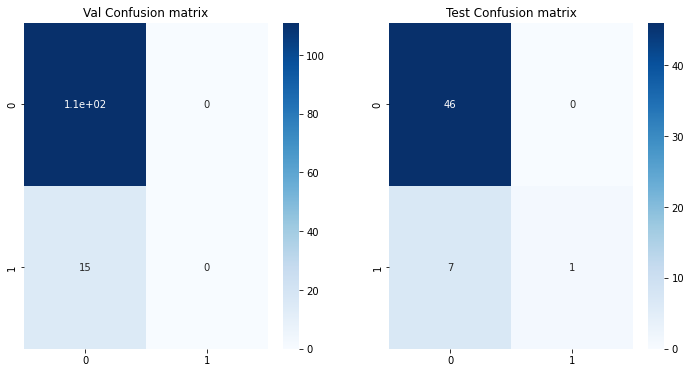

In [19]:
#MODEL_PATH = './test_model.hdf5'
#from keras.models import load_model
##best_model = load_model('./test_model.h5')
#init_model = load_model('./init_model.h5', compile=False)
#best_model = load_model("./test_model.h5", custom_objects={'focal_loss_fixed': focal_loss()})
get_accuracy_metrics(model,  X_train, y_train, X_val, y_val, X_test, y_test)

plot training history

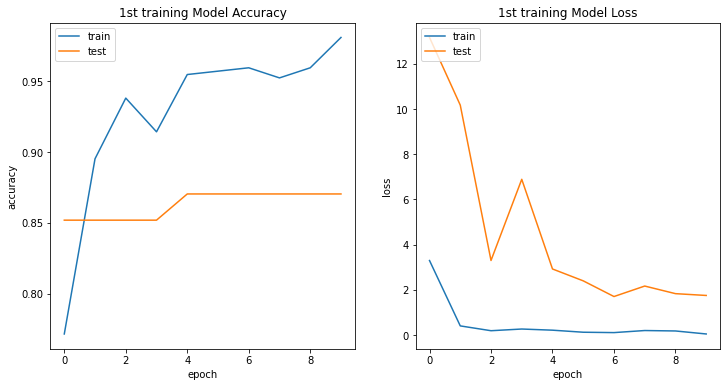

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotting the Accuracy of test and training sets
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('1st training Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
#plotting the loss of test and training sets
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('1st training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plot confusion report

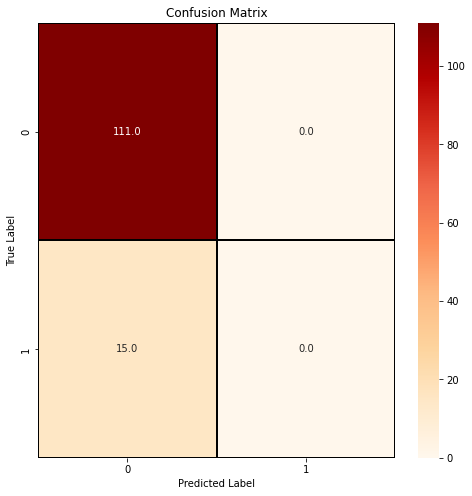

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       111
           1       0.00      0.00      0.00        15

    accuracy                           0.88       126
   macro avg       0.44      0.50      0.47       126
weighted avg       0.78      0.88      0.83       126



# second train: Fine Tune

In [23]:
for model1 in model.layers:
    model1.trainable = True
callbacks2 = [EarlyStopping(monitor='val_loss', patience=5, verbose=1), ModelCheckpoint('test_model.h5', save_best_only=True)]
history2=model.fit(X_train, y_train,validation_data=(X_test, y_test),verbose = 1,epochs = epoch2,callbacks=callbacks2)

Epoch 1/3
14/14 [==============================] - 3s 227ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 1.3090 - val_accuracy: 0.8889
Epoch 2/3
14/14 [==============================] - 3s 236ms/step - loss: 0.0107 - accuracy: 0.9952 - val_loss: 1.0729 - val_accuracy: 0.8704
Epoch 3/3
14/14 [==============================] - 4s 238ms/step - loss: 0.1386 - accuracy: 0.9714 - val_loss: 1.6262 - val_accuracy: 0.8704


Train accuracy Score------------>
98.095 %
Val accuracy Score--------->
86.508 %
Test accuracy Score--------->
87.037 %
F1 Score--------------->
82.454 %
Cohen Kappa Score------------->
19.574 %
Recall-------------->
87.037 %
Precision-------------->
88.749 %


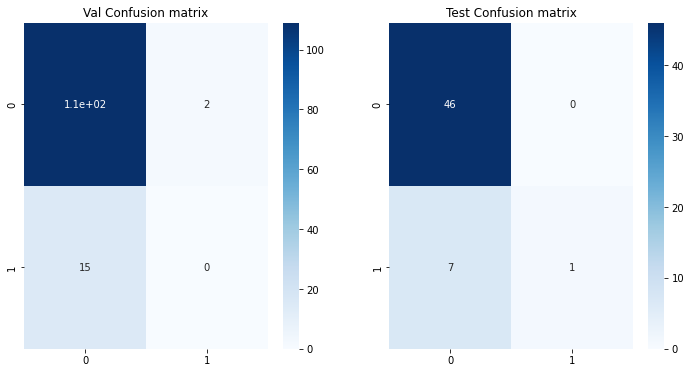

In [24]:
#MODEL_PATH = './test_model.hdf5'
#from keras.models import load_model
#best_model = load_model('./test_model.h5')
#best_model = load_model('./test_model.h5', compile=False)
#best_model = load_model("./test_model.h5", custom_objects={'focal_loss_fixed': focal_loss()})
get_accuracy_metrics(model,  X_train, y_train, X_val, y_val, X_test, y_test)

plot training history

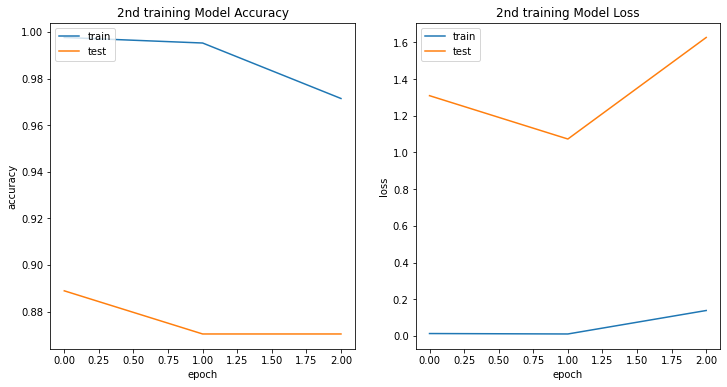

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotting the Accuracy of test and training sets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('2nd training Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
#plotting the loss of test and training sets
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('2nd training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



plot confusion report

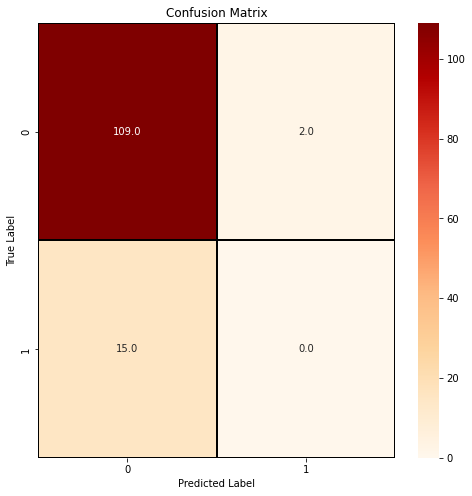

In [26]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       111
           1       0.00      0.00      0.00        15

    accuracy                           0.87       126
   macro avg       0.44      0.49      0.46       126
weighted avg       0.77      0.87      0.82       126



In [28]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('model.hdf5')

/kaggle/working


/kaggle/working/model.hdf5